In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = 'Myopia.csv'
df = pd.read_csv(data)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
# Remove the "MYOPIC" column from the dataset.
labels = df['MYOPIC']
df = df.drop('MYOPIC', axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [15]:
#Perform dimensionality reduction with PCA
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

                        


0.9187361702915187

In [16]:
 #Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

In [17]:
myopia_pca.shape


(618, 10)

In [18]:
tsne = TSNE(learning_rate=100,n_iter = 4500)

tsne_features = tsne.fit_transform(myopia_pca)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [19]:
tsne_features.shape


(618, 2)

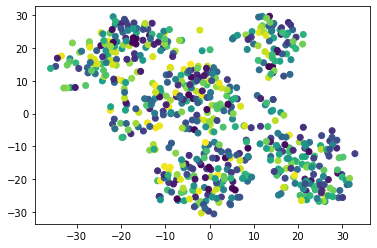

In [20]:
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=np.random.rand(618))


### Part 3: Perform a Cluster Analysis with K-means


In [22]:
# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

AttributeError: 'NoneType' object has no attribute 'split'